<a href="https://colab.research.google.com/github/ilvy22/DeepLearning/blob/master/20200131_Keras_MLP_Regression_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1/31(금), Keras 실습 "MLP로 Regression 구현하기"

## 1. Keras 임포트

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers, optimizers, losses, metrics

## 파일 업로드

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

MessageError: ignored

## 2. 데이터 분석 (EDA)

2.1. 학습데이터 확인 (X1)

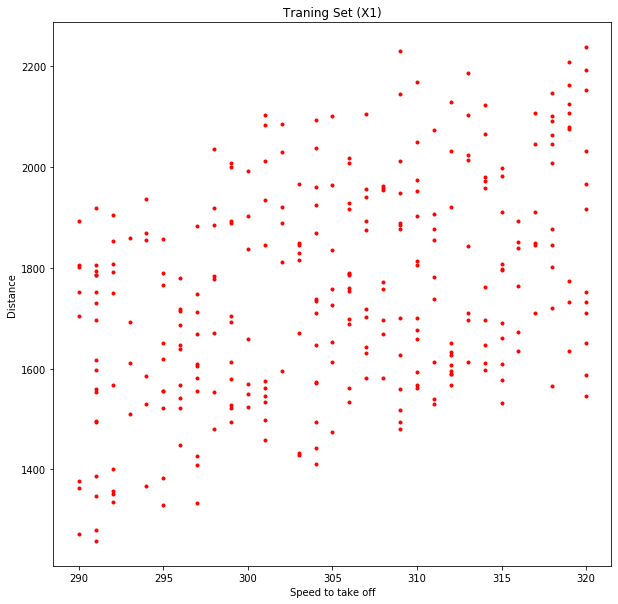

In [54]:
train_csv_data = np.loadtxt('trainset.csv', unpack=True, delimiter=',', skiprows=1)
plt.title("Traning Set (X1)")
plt.xlabel('Speed to take off')
plt.ylabel('Distance')
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(train_csv_data[0], train_csv_data[2], 'r.')

2.2. 학습데이터 확인 (X2)

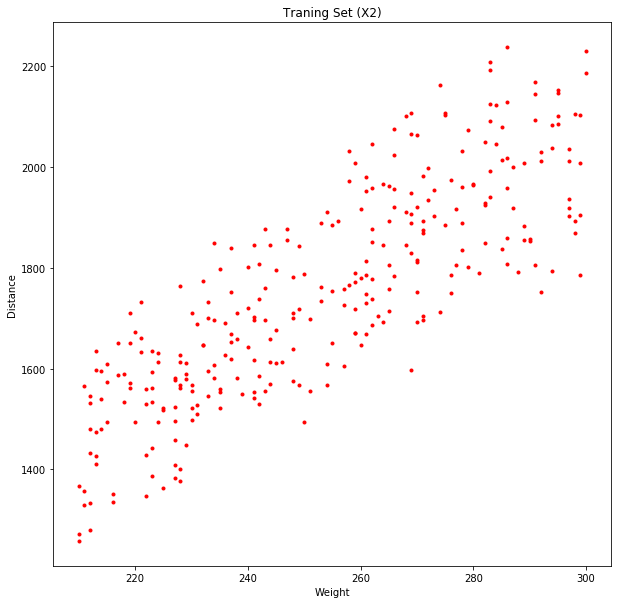

In [55]:
plt.title("Traning Set (X2)")
plt.xlabel('Weight')
plt.ylabel('Distance')
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(train_csv_data[1], train_csv_data[2], 'r.')

## 3. 학습데이터 전처리

3.1. 학습데이터 표준화

In [0]:
train_csv_data = np.loadtxt('trainset.csv', unpack=True, delimiter=',', skiprows=1)
num_points = len(train_csv_data[0])
# print("points : ", num_points)
train_num_colum = len(train_csv_data)
train_mean = []
train_std = []
for i in range(train_num_colum):
  train_mean.append(train_csv_data[i].mean())
  train_std.append(train_csv_data[i].std())
  train_csv_data[i] -= train_csv_data[i].mean()
  train_csv_data[i] /= train_csv_data[i].std()

3.2. 학습데이터 행과 열 변환 (Transpose)

In [0]:
# x_data생성
x_data = np.array([train_csv_data[0], train_csv_data[1]])
x_data = np.array(x_data).transpose()
# y_data reshape
y_data = train_csv_data[2]
y_data = np.array(y_data).transpose()

In [0]:
x_train = x_data[:250]
x_val = x_data[250:]
y_train = y_data[:250]
y_val = y_data[250:]

#4. MLP 학습

4.1. 모델 생성

In [0]:
model = models.Sequential()
model.add(layers.Dense(20, activation='sigmoid', input_shape=(2,)))
model.add(layers.Dense(1))
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['mae'])

4.2. 학습

In [42]:
# history = model.fit(x_data, y_data, epochs=2000, verbose=1, batch_size=50)
history = model.fit(x_train,
                    y_train,
                    epochs=1000,
                    batch_size=50,
                    validation_data=(x_val, y_val))

Train on 250 samples, validate on 50 samples
Epoch 1/1000
250/250 [==============================] - 0s 1ms/step - loss: 1.8178 - mean_absolute_error: 1.0853 - acc: 0.0000e+00 - val_loss: 1.5575 - val_mean_absolute_error: 1.0002 - val_acc: 0.0000e+00
Epoch 2/1000
250/250 [==============================] - 0s 45us/step - loss: 1.6727 - mean_absolute_error: 1.0482 - acc: 0.0000e+00 - val_loss: 1.4426 - val_mean_absolute_error: 0.9687 - val_acc: 0.0000e+00
Epoch 3/1000
250/250 [==============================] - 0s 44us/step - loss: 1.5813 - mean_absolute_error: 1.0221 - acc: 0.0000e+00 - val_loss: 1.3506 - val_mean_absolute_error: 0.9436 - val_acc: 0.0000e+00
Epoch 4/1000
250/250 [==============================] - 0s 42us/step - loss: 1.5058 - mean_absolute_error: 1.0012 - acc: 0.0000e+00 - val_loss: 1.2720 - val_mean_absolute_error: 0.9217 - val_acc: 0.0000e+00
Epoch 5/1000
250/250 [==============================] - 0s 40us/step - loss: 1.4430 - mean_absolute_error: 0.9818 - acc: 0.0000e

4.3. 학습 History 확인

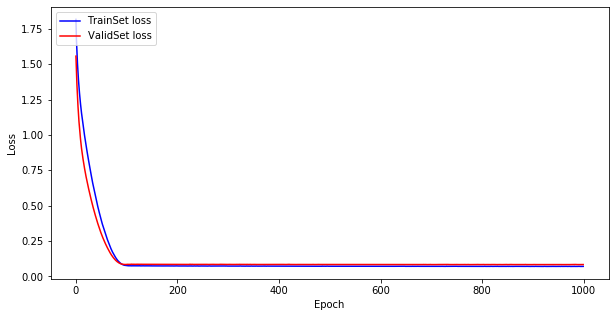

In [58]:
fig, loss_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'b', label='TrainSet loss')
loss_ax.plot(history.history['val_loss'], 'r', label='ValidSet loss')
loss_ax.set_xlabel('Epoch')
loss_ax.set_ylabel('Loss')
loss_ax.legend(loc='upper left')

plt.rcParams["figure.figsize"] = (10,5)
plt.show()

4.4. Weight, bias 확인

In [59]:
w = model.get_weights()
w

[array([[-0.51774335,  0.34107578, -0.12110798,  0.38999033, -0.39699262,
          0.32004637,  0.4299241 ,  0.21038261,  0.5113047 , -0.30980316,
          0.23854229,  0.04550281, -0.06771562, -0.3697143 ,  0.8961381 ,
         -0.61644167, -0.2872933 , -0.16784963, -0.1225573 , -0.16713428],
        [-0.03426574, -1.0540149 , -0.91645133,  0.18596171, -0.53013307,
          0.23441535,  0.16374244,  0.586197  ,  0.14017126, -0.39120218,
          0.03616313, -0.28892204,  0.3356669 , -0.48748118,  0.8946793 ,
         -0.14427578, -0.00731373, -0.3016496 ,  0.6575336 , -0.0635832 ]],
       dtype=float32),
 array([-0.04735228, -0.31172934,  0.17526934, -0.01520325,  0.26116475,
        -0.00912793, -0.01794433, -0.12283877, -0.03588748,  0.1967834 ,
         0.14831063, -0.144663  ,  0.16970246,  0.21464942, -0.7870318 ,
         0.09421268, -0.12346476, -0.05020783,  0.16756685, -0.1202888 ],
       dtype=float32),
 array([[-0.08484071],
        [-0.54212636],
        [-0.6397843 

In [47]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving testset.csv to testset.csv
User uploaded file "testset.csv" with length 1166 bytes


# 5. 시험데이터로 학습모델 성능 검증

5.1. 시험데이터 불러오기

In [0]:
test_csv_data_real = np.loadtxt('testset.csv', unpack=True, delimiter=',', skiprows=1)
test_csv_data_predict = np.loadtxt('testset.csv', unpack=True, delimiter=',', skiprows=1)
test_num_colum = len(test_csv_data_real)
# test_num_colum
# test_csv_data
# test_csv_data_predict

5.2. 시험데이터 표준화

In [0]:
#테스트셋 표준화 진행
for i in range(test_num_colum):
    test_csv_data_predict[i] -= train_mean[i]
    test_csv_data_predict[i] /= train_std[i]

5.3. 학습데이터 행과 열 변환 (Transpose)

In [0]:
test_x_data = np.array([test_csv_data_predict[0], test_csv_data_predict[1]])
test_x_data = np.array(test_x_data).transpose()
# test_x_data

5.4. 시험데이터 결과 예측

In [0]:
prediction = model.predict(test_x_data)
prediction *= train_std[2]
prediction += train_mean[2]
# len(prediction)

5.5. 결과 확인

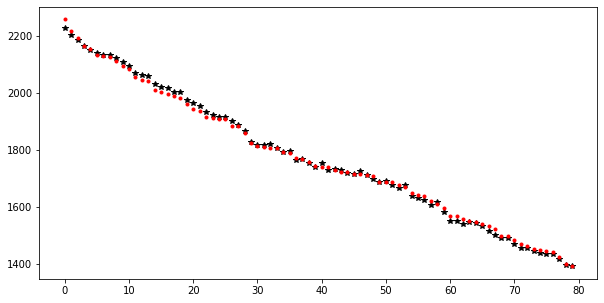

In [52]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(range(len(prediction)), prediction, 'k*')
plt.plot(range(len(prediction)), test_csv_data_real[2], 'r.')
plt.show()